# PTDS2403 - Regression

### Project Title: Data Science Regression Project
#### Done By: David Harrison

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## 1.  Background Context
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.



<a href=#one></a>
## 2.  Importing Packages
<a href=#cont>Back to Table of Contents</a>


Various libraries and packages are imported in order to do data analysis (Numpy, Pandas), and visualisations (Matplotlib, Seaborn)

In [1]:
# Libraries for data loading, manipulation and analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.graphics.correlation as sgc
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence


---
<a href=#two></a>
## 3.  Data Collection and Description
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## 4. Loading Data
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.

The data used for this project was located in the `AvoData.csv` file. To better manipulate and analyse the `AvoData.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `df`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [2]:
#Loading Dataset
df = pd.read_csv("co2_emissions_from_agri.csv", index_col=False)
df.head() 

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


<div class="alert alert-block alert-danger">
<b>To prevent any major unnecessary changes occurring to the original data</b> , a copy of the dataframe was made using the df.copy() method and referred to as `df_copy`.
</div>

In [3]:
# Make a copy of the dataframe
df_copy = df.copy()

---
<a href=#four></a>
## 5.  Data Cleaning and Filtering
<a href=#cont>Back to Table of Contents</a>



Look at the shape of the dataframe using `.shape`.

In [4]:
# Displays the number of rows and columns
df_copy.shape

(6965, 31)

**Results:**  the dataset has 6965 rows and 31 columns

One of the univariate analysis (non-graphical), is the method `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [5]:
## Display summary information about the DataFrame.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

**Results**:  Area column is of type object.  Year column is of type integer.  The remaining columns of of type float.

**There are null values, replace with zeros**

Check for duplicate rows in the dataframe.


In [7]:
duplicate_count = df_copy.duplicated().sum()
print('Number of Duplicate Rows:',duplicate_count)

Number of Duplicate Rows: 0


Upon investigating the data it was discovered that the rows for China are duplicated.  A total row for China and then subtotals for the different regions in China:  

In [8]:
china_filter = {'China','China, Hong Kong SAR','China, Macao SAR','China, mainland','China, Taiwan Province of'}
year_2020 = df_copy['Year'] == 2020
china = df_copy[df_copy['Area'].isin(china_filter) & year_2020 ]
china

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
1324,China,2020,163.8876,603.8159,33490.0741,149256.66250,3916.9002,8525.0,40641.4559,-651765.3001,...,60419.0966,0.0,0.0,123159.8608,554487938.0,902077760.0,743586579.0,713341908.0,3.115114e+06,1.574000
1355,"China, Hong Kong SAR",2020,0.0000,0.0000,NaN,0.00000,0.0000,2.0,853.6742,NaN,...,28.5071,0.0,0.0,NaN,0.0,7547652.0,3462186.0,4038771.0,1.387787e+04,1.757833
1386,"China, Macao SAR",2020,0.0000,0.0000,NaN,764.89281,0.0000,1.0,52.6209,NaN,...,0.7746,0.0,0.0,26.2588,0.0,651875.0,317655.0,358628.0,3.637688e+03,1.757833
1417,"China, mainland",2020,163.8876,603.8159,33384.8108,147922.61120,3916.9002,8210.0,35648.7214,-651765.3001,...,59298.4815,0.0,0.0,121510.5493,549472347.0,875075919.0,727993760.0,696936022.0,3.039089e+06,1.573417
1448,"China, Taiwan Province of",2020,0.0000,0.0000,105.2633,1334.05130,0.0000,313.0,4086.4396,NaN,...,1091.3334,0.0,0.0,1623.0499,5015591.0,18802314.0,11812978.0,12008487.0,6.740693e+04,1.673250


Filter out the various China sub areas to leave only China in the dataframe.

In [9]:
china_filter = {'China, Hong Kong SAR','China, Macao SAR','China, mainland','China, Taiwan Province of'}
filtered_data = df_copy[~df_copy['Area'].isin(china_filter)]
filtered_data.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


Check the shape of the dataframe to see if the rows have been filtered out.

In [10]:
filtered_data.shape

(6841, 31)

**Results:** the number of rows have dropped from 6965 to 6841, (124 rows = 31 years x 4 areas)

Rename column headings according to PEP8 conventions

In [11]:
new_column_names = {
                    'Savanna fires': 'Fire_Savanna',
                    'Forest fires': 'Fire_Forest',
                    'Crop Residues': 'Crop_Residues',
                    'Rice Cultivation': 'Rice_Cultivation',
                    'Drained organic soils (CO2)': 'Drained_Organic_Soils',
                    'Pesticides Manufacturing': 'Pesticides_Manuf',
                    'Food Transport': 'Food_Transport',
                    'Net Forest conversion': 'Net_Forest_Conversion',
                    'Food Household Consumption': 'Food_Consumption',
                    'Food Retail': 'Food_Retail',
                    'On-farm Electricity Use': 'Farm_Electricity',
                    'Food Packaging': 'Food_Packaging',
                    'Agrifood Systems Waste Disposal': 'Agrifood_Waste_Disposal',
                    'Food Processing': 'Food_Processing',
                    'Fertilizers Manufacturing': 'Fertilizer_Manuf',
                    'Manure applied to Soils': 'Manure_Soil',
                    'Manure left on Pasture': 'Manure_Pasture',
                    'Manure Management': 'Manure_Mngt',
                    'Fires in organic soils': 'Fire_Organic_Soil',
                    'Fires in humid tropical forests': 'Fire_Trop_Forest',
                    'On-farm energy use': 'Farm_Energy_Use',
                    'Rural population': 'Population_Rural',
                    'Urban population':'Population_Urban',
                    'Total Population - Male': 'Population_Male',
                    'Total Population - Female': 'Population_Female',
                    'total_emission': 'Total_Emission',
                    'Average Temperature °C': 'Ave_Temp_Change'}
filtered_data = filtered_data.rename(columns=new_column_names)
filtered_data.head()

,Area,Year,Fire_Savanna,Fire_Forest,Crop_Residues,Rice_Cultivation,Drained_Organic_Soils,Pesticides_Manuf,Food_Transport,Forestland,...,Manure_Mngt,Fire_Organic_Soil,Fire_Trop_Forest,Farm_Energy_Use,Population_Rural,Population_Urban,Population_Male,Population_Female,Total_Emission,Ave_Temp_Change
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


Create a dataframe containing the sum of all areas by year, for future analysis.

In [12]:
group_by_year = filtered_data.drop('Area',axis=1)
group_by_year = group_by_year.groupby('Year',as_index=False).sum()
group_by_year.head()

,Year,Fire_Savanna,Fire_Forest,Crop_Residues,Rice_Cultivation,Drained_Organic_Soils,Pesticides_Manuf,Food_Transport,Forestland,Net_Forest_Conversion,...,Manure_Mngt,Fire_Organic_Soil,Fire_Trop_Forest,Farm_Energy_Use,Population_Rural,Population_Urban,Population_Male,Population_Female,Total_Emission,Ave_Temp_Change
0,1990,265219.7764,203033.5448,129274.5967,763986.999421,748744.7314,49074.550375,302018.006352,-3.430992e+06,4.209701e+06,...,378860.9659,264122.169747,146382.5688,621782.7338,3.011132e+09,2.252896e+09,2.650815e+09,2.630239e+09,1.027680e+07,115.597721
1,1991,265219.7764,203033.5448,125090.1593,767251.114070,748744.7314,48585.455756,309792.682238,-3.430992e+06,4.209701e+06,...,379233.2495,264122.169747,146382.5688,638474.4798,3.041545e+09,2.308920e+09,2.695913e+09,2.673700e+09,1.041612e+07,62.703188
2,1992,265219.7764,203033.5446,129682.5013,778903.240658,748744.7313,51352.699070,312264.991286,-3.430992e+06,4.209701e+06,...,372979.2875,264122.169747,146382.5688,472433.1236,3.070030e+09,2.364699e+09,2.739080e+09,2.715468e+09,1.027601e+07,62.775760
3,1993,265219.7763,203033.5446,126771.4723,772148.301630,749178.5677,50985.061809,311978.109409,-3.430992e+06,4.209701e+06,...,370818.8110,264122.169747,146382.5688,458515.1066,3.096564e+09,2.420478e+09,2.781224e+09,2.756545e+09,1.032498e+07,56.983233
4,1994,265219.7763,203033.5446,129014.7731,776767.848135,748847.1904,54514.553611,314450.233344,-3.430992e+06,4.209701e+06,...,372780.6081,264122.169747,146382.5688,462410.6108,3.121494e+09,2.476384e+09,2.822631e+09,2.796881e+09,1.048408e+07,131.133107


Aggregate columns into groups for: Forestland, Fires, Farm, Food

In [ ]:
'''
df_aggregate = filtered_data.copy()
df_aggregate['Forests'] = df_aggregate['Forestland'] + df_aggregate['Net_Forest_Conversion']
df_aggregate['Fires'] = df_aggregate['Fire_Savanna'] + df_aggregate['Fire_Forest'] + df_aggregate['Fire_Organic_Soil'] + df_aggregate['Fire_Trop_Forest']
df_aggregate['Farming_Other'] = df_aggregate['Farm_Electricity'] + df_aggregate['Crop_Residues'] + df_aggregate['Farm_Energy_Use'] + df_aggregate['Pesticides_Manuf']
+ df_aggregate['Agrifood_Waste_Disposal'] + df_aggregate['Fertilizer_Manuf']
df_aggregate['Manure'] = df_aggregate['Manure_Soil'] + df_aggregate['Manure_Pasture'] + df_aggregate['Manure_Mngt']
df_aggregate['Food'] = df_aggregate['Food_Transport'] + df_aggregate['Food_Consumption'] + df_aggregate['Food_Retail'] + df_aggregate['Food_Processing']
+ df_aggregate['Food_Packaging']
df_aggregate['Population_Total'] = df_aggregate['Population_Rural'] + df_aggregate['Population_Urban']
columns_to_drop = ['Forestland', 'Net_Forest_Conversion', 'Fire_Savanna', 'Fire_Forest', 'Fire_Organic_Soil', 'Fire_Trop_Forest','Farm_Electricity',
                   'Crop_Residues', 'Farm_Energy_Use', 'Manure_Soil', 'Manure_Pasture', 'Manure_Mngt', 'Food_Transport', 'Food_Consumption','Food_Retail', 
                   'Food_Processing', 'Food_Packaging','Population_Male','Population_Female','Pesticides_Manuf','Agrifood_Waste_Disposal',
                    'Fertilizer_Manuf' ]
df_aggregate = df_aggregate.drop(columns=columns_to_drop)
df_aggregate.head()
'''

,Area,Year,Rice_Cultivation,Drained_Organic_Soils,IPPU,Population_Rural,Population_Urban,Total_Emission,Ave_Temp_Change,Forests,Fires,Farming_Other,Manure,Food,Population_Total
0,Afghanistan,1990,686.00,0.0,209.9778,9655167.0,2593947.0,2198.963539,0.536167,-2388.803,14.7794,NaN,2169.8513,504.05909,12249114.0
1,Afghanistan,1991,678.16,0.0,217.0388,10230490.0,2763167.0,2323.876629,0.020667,-2388.803,14.7794,NaN,2268.1735,510.59409,12993657.0
2,Afghanistan,1992,686.00,0.0,222.1156,10995568.0,2985663.0,2356.304229,-0.259583,-2388.803,14.7794,NaN,2267.4190,512.47249,13981231.0
3,Afghanistan,1993,686.00,0.0,201.2057,11858090.0,3237009.0,2368.470529,0.101917,-2388.803,14.7794,NaN,2256.9791,473.10439,15095099.0
4,Afghanistan,1994,705.60,0.0,182.2905,12690115.0,3482604.0,2500.768729,0.372250,-2388.803,14.7794,NaN,2324.6596,485.40819,16172719.0


In [14]:
df_aggregate.shape

(6841, 15)

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


Describe the features in the dataset using .describe()

In [16]:
filtered_data.shape

(6841, 37)

In [15]:
filtered_data.describe().T.round(0).applymap(lambda x: f"{int(x):,}" if isinstance(x, (int, float)) else x)


C:\Users\F4688813\AppData\Local\Temp\ipykernel_20912\3854784879.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_data.describe().T.round(0).applymap(lambda x: f"{int(x):,}" if isinstance(x, (int, float)) else x)


,count,mean,std,min,25%,50%,75%,max
Year,"6,841","2,005",9,"1,990","1,997","2,005","2,013","2,020"
Fire_Savanna,"6,810","1,209","5,292",0,0,2,111,"114,616"
Fire_Forest,"6,748",932,"3,752",0,0,1,65,"52,228"
Crop_Residues,"5,513",857,"3,146",0,11,101,369,"33,490"
Rice_Cultivation,"6,841","3,654","14,868",0,181,511,"1,517","164,915"
Drained_Organic_Soils,"6,841","3,549","15,999",0,0,0,690,"241,025"
Pesticides_Manuf,"6,841",291,"1,257",0,6,13,111,"16,459"
Food_Transport,"6,841","1,852","5,456",0,27,197,"1,168","67,946"
Forestland,"6,441","-15,738","75,457","-797,183","-2,695",-62,0,"171,121"
Net_Forest_Conversion,"6,441","17,690","101,393",0,0,47,"4,746","1,605,106"


Plot histograms of the features to understand the distribution

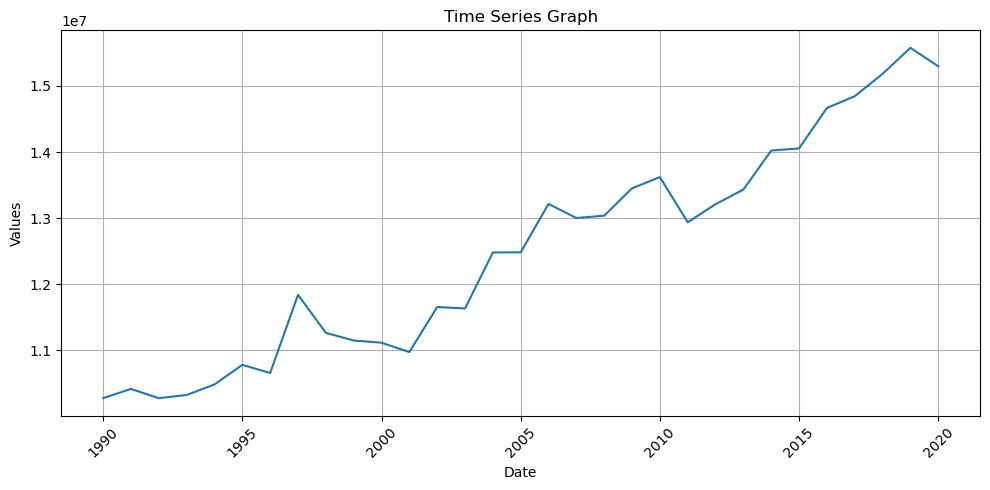

In [ ]:
# Plotting the time series

plt.figure(figsize=(10, 5))
plt.plot(group_by_year['Year'], group_by_year['Total_Emission'])
plt.title('Time Series Graph')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
